## 빅데이터 활용 AI 설계
# CartPole-v0 with Keras
- https://gist.github.com/tsu-nera/edd306ddeefebe4afb1efceefbc3f953 소스 참고
- dqn_cartpole_keras.py 로 다운받음

### OpenAI gym
- 설치 : pip install gym
- 홈페이지 : http://gym.openai.com/
- 공식블로그 : https://github.com/openai/gym

### gym 기본 사용법

```
import gym

env = gym.make("CartPole-v1")
observation = env.reset()

for _ in range(1000):
  env.render()
  action = env.action_space.sample() # your agent here (this takes random actions)
  observation, reward, done, info = env.step(action)

  if done:
    observation = env.reset()

env.close()
```

### CartPole-v0 게임 정보

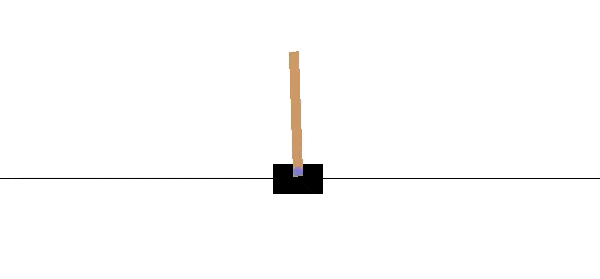

#### 사이트
- https://github.com/openai/gym/wiki/CartPole-v0
- https://gym.openai.com/envs/CartPole-v0/

#### States
- x 좌표 (-2.4 ~ 2.4)
- 이동 속도 (-inf ~ inf)
- 각도 (-41.8도 ~ 41.8도)
- 각속도 (-inf ~ inf)

#### Actions
- 0 : push cart to the left
- 1 : push cart to the right

#### Rewards
- Reward is 1 for every step taken, including the termination step

#### 종료 조건
- 12도를 넘어가는 경우 (실제로는 20도로 적용되는 걸로 보임. 20.01도 등은 종료안함.)
- 중심에서 2.4 만큼 멀어지는 경우 (화면 경계임)

#### 해결 판정
- 100번 실행했을 때, 총보상의 평균값이 195점 이상 나올때

#### v0 과 v1 의 차이
- 최대 시행횟수가 200 과 500 임
- https://stackoverflow.com/questions/56904270/difference-between-openai-gym-environments-cartpole-v0-and-cartpole-v1

### 실행 테스트

In [3]:
import gym

env = gym.make("CartPole-v0")
observation = env.reset()

for i in range(1000):
    env.render()
    action = env.action_space.sample() # your agent here (this takes random actions)
    observation, reward, done, info = env.step(action)

    if (i+1)%100 == 0:
        print(i+1, observation, reward, done, info)
        
    if done:
        observation = env.reset()

env.close()

100 [ 0.00963523 -0.13865754 -0.03115811  0.13762115] 1.0 False {}
200 [ 0.05855011  0.34014711  0.0187925  -0.25489042] 1.0 False {}
300 [ 0.00962226  0.433914   -0.13831587 -0.89224852] 1.0 False {}
400 [ 0.04535148  0.03499778 -0.01926139 -0.00414132] 1.0 False {}
500 [ 0.01482263 -0.16496721 -0.02927141  0.26706512] 1.0 False {}
600 [-0.01274132  0.7750831  -0.07751519 -1.29865742] 1.0 False {}
700 [ 0.00985845  0.39210047  0.02368744 -0.45026255] 1.0 False {}
800 [-0.02459865 -0.18000234  0.10394184  0.46793501] 1.0 False {}
900 [ 0.05392845  0.38521305 -0.18881818 -0.94325695] 1.0 False {}
1000 [ 0.02812995  0.39948908 -0.09705501 -0.6829328 ] 1.0 False {}


### 초기 설정

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import gym

In [5]:
env = gym.make('CartPole-v0')

### 케라스 모델 생성

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop

C:\Anaconda3\envs\py36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


- 입력 : 상태값 4개 (x좌표, 이동속도, 각도, 각속도)
- 출력 : 행동 2개에 대한 Q값

In [7]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(4,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='linear')) # 0 or 1

model.compile(loss='mse', optimizer=RMSprop(lr=0.001)) # lr=0.001 (default)

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                80        
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 34        
Total params: 386
Trainable params: 386
Non-trainable params: 0
_________________________________________________________________


- Q값 얻어내기

In [24]:
s = np.array([1,0,1,0])

model.predict(s.reshape(1,4))

array([[0.0059104 , 0.02099181]], dtype=float32)

- 가중치 확인 (초기 셋팅값)
- 초기값 설정 : https://keras.io/initializers/

In [26]:
ws = model.get_weights()

In [27]:
ws[0]

array([[-0.10128778, -0.03518373,  0.31941575, -0.38432896, -0.18192643,
         0.1713854 , -0.27279335, -0.1486131 , -0.07942459, -0.45708877,
         0.10890102,  0.09483194, -0.49641055, -0.05403948,  0.09055692,
        -0.4748562 ],
       [-0.17529875,  0.18132079,  0.22750884,  0.09627491,  0.01750338,
         0.15066713, -0.11466891, -0.54129714,  0.25865948, -0.21445534,
        -0.25926176, -0.5234067 , -0.5314047 ,  0.5256541 , -0.38044032,
         0.49869287],
       [ 0.3700781 ,  0.47584128, -0.07977301,  0.5089061 ,  0.03497154,
         0.01774341,  0.40471834, -0.13499442, -0.11919808, -0.45927846,
        -0.10829261,  0.269332  ,  0.47425938,  0.08524293,  0.46433628,
        -0.16485724],
       [-0.23287296, -0.40719151, -0.08125243,  0.5072242 ,  0.25558728,
        -0.11382714, -0.31913143,  0.29808795, -0.4492752 ,  0.04185933,
         0.35437614, -0.19732633,  0.16063225, -0.42413077,  0.46120906,
        -0.49801153]], dtype=float32)

In [16]:
ws[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

### 버퍼 지정
- 시뮬레이션 이력을 저장해 놓는다
- 총 10000개의 이력 저장
- collections.deque 는 버퍼가 꽉 차면 오래된 데이터 부터 버린다

In [53]:
import collections

memory = collections.deque(maxlen = 10000)

### 사전 학습
- 한 번에 학습할 배치 크기를 32 로 할 예정이므로, 미리 32개의 이력을 만들어 놓는다
- 랜덤 행동을 하여 memory 에 저장한다

In [54]:
s = env.reset()

In [55]:
for i in range(32):
    action = env.action_space.sample() # np.random.randint(2)
    s2, r, done, _ = env.step(action)
    
    memory.append([s, action, r, done, s2])
    
    s = env.reset() if done else s2 # done 이면 리셋

In [56]:
len(memory)

32

In [57]:
display(memory[0], memory[-1])

[array([ 0.00678465, -0.0087368 ,  0.03761938,  0.02771324]),
 1,
 1.0,
 False,
 array([ 0.00660992,  0.18582603,  0.03817365, -0.25286704])]

[array([-0.01651723,  0.0397381 , -0.04994808, -0.00332583]),
 1,
 1.0,
 False,
 array([-0.01572246,  0.23553948, -0.0500146 , -0.31134024])]

### Q-learning & SARSA

- Temporal difference learning
<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/9c2c752364a919d563253cdab2ab846e59d5cb8d' /><br>

- Q-learning
<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/47fa1e5cf8cf75996a777c11c7b9445dc96d4637' /><br>

- SARSA (State–action–reward–state–action)
<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/4ea76ebe74645baff9d5a67c83eac1daff812d79' /><br>

(출처 : wikipedia)

### Exploitation vs Exploration (관례 대 탐험)
- Exploitation : 기존 경험에 비추어 결과가 가장 좋았던 행동을 수행하는 행동 결정 방식
- Exploration : 가장 좋았던 행동이 아니라 새로운 행동을 수행하는 방식 (흔하게는 랜덤 행동 수행)
- 일반적으로, 처음에는 탐험을 하다가 경험이 쌓일 수록 점점 관례를 많이 따르도록 한다.
- epsilon($\epsilon$) : 탐험을 수행할 확률을 지정

### 학습 실행

In [58]:
epsilon = 1.0 # 처음에는 탐험만 수행한다. (랜덤 행동)
gamma = 0.99 # 감쇠율 (discount factor, 미래 보상을 얼마나 중요시할 지를 결정)
returns = [] # 에피소드 당 총보상값을 저장한다
count = 0

In [59]:
### 총 10000번의 에피소드를 진행한다.
for episode in range(300):
    
    total_reward = 0 # 에피소스당 총보상값
    
    s = env.reset()
    
    for i in range(200): # 한 에피소드당 최대 200번만 행동한다
        
        ### 탐험 확률 지정 (1 부터 시작해서 점점 낮아지다 최소값은 1%)
        epsilon = 0.01 + (1-0.01)*np.exp(-0.0001*count)
        count += 1
        
        if np.random.rand() < epsilon:
            action = env.action_space.sample() # 랜덤 행동
        else:
            action = np.argmax(model.predict(s.reshape(1,4))[0]) # Q값이 높은 행동 선택
            
        s2, r, done, _ = env.step(action)
        
        total_reward += r
        
        memory.append([s, action, r, done, s2])
        
        ### 학습 (배치크기는 32)
        indices = np.random.choice(len(memory), 32, replace=False)
        samples = [memory[i] for i in indices]
        
        X = np.zeros([32,4]) # 입력 상태값
        y = np.zeros([32,2]) # 목표 Q값
        
        for i, sample in enumerate(samples): # sample -> [s,a,r,done,s2]
            X[i] = sample[0]
            y[i] = model.predict(sample[0].reshape(1,4))[0]
            
            if sample[3] == True: # done
                y[i][sample[1]] = sample[2]
            else:
                y[i][sample[1]] = sample[2] + gamma*np.max(model.predict(sample[-1].reshape(1,4))[0])
                
        model.fit(X, y, epochs=1, verbose=False)
        
        if done:
            break
        else:
            s = s2
            
    print('Episode: %d, Reward: %d, Epsilon: %.5f' % (episode+1, total_reward, epsilon))
    returns.append(total_reward)

Episode: 1, Reward: 23, Epsilon: 0.99782
Episode: 2, Reward: 20, Epsilon: 0.99585
Episode: 3, Reward: 9, Epsilon: 0.99496
Episode: 4, Reward: 14, Epsilon: 0.99359
Episode: 5, Reward: 23, Epsilon: 0.99133
Episode: 6, Reward: 11, Epsilon: 0.99025
Episode: 7, Reward: 15, Epsilon: 0.98878
Episode: 8, Reward: 16, Epsilon: 0.98721
Episode: 9, Reward: 14, Epsilon: 0.98585
Episode: 10, Reward: 24, Epsilon: 0.98351
Episode: 11, Reward: 37, Epsilon: 0.97991
Episode: 12, Reward: 19, Epsilon: 0.97807
Episode: 13, Reward: 11, Epsilon: 0.97701
Episode: 14, Reward: 23, Epsilon: 0.97478
Episode: 15, Reward: 21, Epsilon: 0.97276
Episode: 16, Reward: 15, Epsilon: 0.97132
Episode: 17, Reward: 27, Epsilon: 0.96873
Episode: 18, Reward: 12, Epsilon: 0.96758
Episode: 19, Reward: 9, Epsilon: 0.96671
Episode: 20, Reward: 20, Epsilon: 0.96480
Episode: 21, Reward: 32, Epsilon: 0.96175
Episode: 22, Reward: 10, Epsilon: 0.96080
Episode: 23, Reward: 16, Epsilon: 0.95928
Episode: 24, Reward: 15, Epsilon: 0.95786
Epi

Episode: 193, Reward: 118, Epsilon: 0.23584
Episode: 194, Reward: 161, Epsilon: 0.23223
Episode: 195, Reward: 131, Epsilon: 0.22934
Episode: 196, Reward: 138, Epsilon: 0.22633
Episode: 197, Reward: 121, Epsilon: 0.22373
Episode: 198, Reward: 126, Epsilon: 0.22105
Episode: 199, Reward: 86, Epsilon: 0.21924
Episode: 200, Reward: 106, Epsilon: 0.21704
Episode: 201, Reward: 138, Epsilon: 0.21420
Episode: 202, Reward: 108, Epsilon: 0.21201
Episode: 203, Reward: 114, Epsilon: 0.20972
Episode: 204, Reward: 112, Epsilon: 0.20749
Episode: 205, Reward: 100, Epsilon: 0.20553
Episode: 206, Reward: 104, Epsilon: 0.20351
Episode: 207, Reward: 93, Epsilon: 0.20171
Episode: 208, Reward: 81, Epsilon: 0.20017
Episode: 209, Reward: 71, Epsilon: 0.19882
Episode: 210, Reward: 72, Epsilon: 0.19747
Episode: 211, Reward: 75, Epsilon: 0.19607
Episode: 212, Reward: 20, Epsilon: 0.19569
Episode: 213, Reward: 70, Epsilon: 0.19440
Episode: 214, Reward: 66, Epsilon: 0.19319
Episode: 215, Reward: 93, Epsilon: 0.1914

In [60]:
len(returns), len(memory)

(300, 10000)

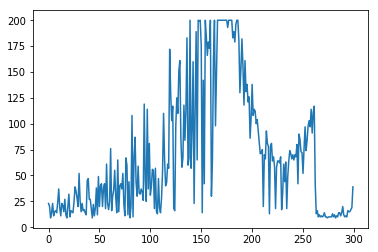

In [61]:
plt.plot(returns)

### 게임 테스트

In [64]:
for epoch in range(3):
    env.reset()
    
    done = False
    n = 0
    while not done:
        #a = np.random.randint(2)
        a = np.argmax(model.predict(s.reshape(1,4))[0])
        s, r, done, info = env.step(a)
        n += 1
        env.render()
        #print(s, r, done, info)
        
    print('Epoch: %d, Count: %d' % (epoch+1, n))
    print(s, r, done, info)
    #input()

Epoch: 1, Count: 48
[0.21030319 1.06629887 0.21502625 0.17219575] 1.0 True {}
Epoch: 2, Count: 50
[0.19367029 1.07317486 0.2162952  0.159104  ] 1.0 True {}
Epoch: 3, Count: 42
[0.18005693 1.07936348 0.2097962  0.03738311] 1.0 True {}


In [65]:
env.close()